In [1]:
from sympy import Point
import matplotlib.pyplot as plt

### Аргументы функции: обязательные, необязательные, аргументы, количество которых заранее неизвестно.

#### обязательные аргументы:
в описании функции указывается имя переменной, при вызове передается ее значение; последовательность обязательных аргументов при вызове такая же, как при описании; обязательные аргументы при описании функции указываются первыми;
#### необязательные, аргументы:
в описании функции после имени аргумента и знака = указывается значение аргумента по умолчанию; необязательные аргументы при описании функции идут последними
####  аргументы, количество которых заранее неизвестно:
после знака * указывается имя tuple из таких аргументов

In [2]:
def func(a,*b,c=2):
    print('a=%f, b=%s, c=%f'%(a,b,c))
func(3,'r','f','g',c=4)

a=3.000000, b=('r', 'f', 'g'), c=4.000000


Вот что получится, если для необязательного аргумента не передать его имя и =

In [3]:
func(3,'r','f','g',4)

a=3.000000, b=('r', 'f', 'g', 4), c=2.000000


4 было воспринято как последний аргумент в списке аргументов, количество которых заранее неизвестно (key arguments)

Если у функции есть только обязательные и необязательные аргументы, результат другой:

In [4]:
def func_new(a,c=2):
    print('a=%f,  c=%f'%(a,c))
func_new(3,4)    

a=3.000000,  c=4.000000


In [5]:
# создаем класс Ломаная
class Poly_chain:
    """ Самостоятельный Poly_chain class """
    _Vertices={}
    def __init__(self, *_Points,_Points_names=None):
        _points_number=len(_Points)
        if _points_number>0:
            if type(_Points_names)!='tuple':
                counter=1
                for _P in _Points:
                    self._Vertices['A_'+str(counter)]=_P
                    counter+=1
            else:
                for counter in range(_points_number):
                    self._Vertices[_Points_names[counter]]=_Points[counter]
            
        return None
    def vertices(self):
        return self._Vertices.values()
    def vertices_names(self):
        return self._Vertices.keys()
    def named_vertices(self):
        return self._Vertices
    def plot(self,color='blue'):
        plt.plot([P.x for P in list(self._Vertices.values())],[P.y for P in list(self._Vertices.values())], color)
        return None
    def plot_annotated(self,color='blue'):
        self.plot(color)
        for V_name in (self.named_vertices().keys()):
            chain_point=self.named_vertices()[V_name]
            plt.annotate('$'+V_name+'$',xy=(chain_point.x, chain_point.y),xytext=(0, 5), textcoords='offset points' )
        return None

Построим ломаную Chain1 и посмотрим, какое значение приняла переменная _Vertices класса Poly_chain, для этого воспользуемся методом vertices

In [6]:
Chain1=Poly_chain()
Chain1.vertices()

dict_values([])

При создании экземпляра класса мы не задали вершин ломаной, так что получилась пустая ломаная

Введем точки А,В,С и построим ломаную Chain2.

In [7]:
A=Point(1,2)
B=Point(0,1)
C=Point(1,0)
Chain2=Poly_chain(A,B,C)
display(Chain2.vertices())
display(Chain2.vertices_names())
display(Chain2.named_vertices())

dict_values([Point2D(1, 2), Point2D(0, 1), Point2D(1, 0)])

dict_keys(['A_1', 'A_2', 'A_3'])

{'A_1': Point2D(1, 2), 'A_2': Point2D(0, 1), 'A_3': Point2D(1, 0)}

изобразим ломаную Chain2 на графике

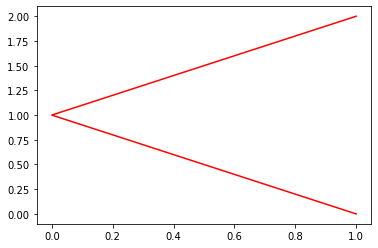

In [8]:
Chain2.plot(color='r')

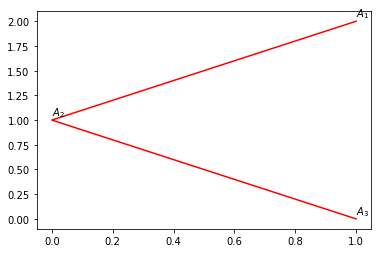

In [9]:
Chain2.plot_annotated(color='r')

Построим теперь дочерний класс замкнутых ломаных,
отличие - в работе метода plot, этот метод соединяет линией еще и первую вершину с последней.

In [10]:
    
class Closed_Poly_chain(Poly_chain):
    """ Потомок Poly_chain class """
    def __init__(self, *_Points,_Points_names=None):
        # Необходимо вызвать метод инициализации родителя.
        # В Python 3.x это делается при помощи функции super()
        super().__init__(*_Points,_Points_names=_Points_names)
        return None
    def plot(self,_color='blue'):
        _V=self.vertices+[self._Vertices[0]]
        plt.plot([P.x for P in self._Vertices],[P.y for P in self._Vertices], _color)
        return None
    def display(self):
        print('ломаная( %s на %s)' % (self.length,self.width))
        return None

In [11]:
Chain1=Poly_chain()
Chain1.vertices()

dict_values([Point2D(1, 2), Point2D(0, 1), Point2D(1, 0)])

In [12]:
A=Point(1,2)
B=Point(0,1)
C=Point(1,0)
Chain2=Closed_Poly_chain(A,B,C,_Points_names=['A','B','C'])
Chain2.vertices()

dict_values([Point2D(1, 2), Point2D(0, 1), Point2D(1, 0)])

In [13]:
Chain2.vertices_names()

dict_keys(['A_1', 'A_2', 'A_3'])